In [558]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [559]:
df_energy = pd.read_csv('dataset/energy_dataset.csv')
df_weather = pd.read_csv('dataset/weather_features.csv')

# Energy info

In [560]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [561]:
df_energy.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [562]:
df_energy = df_energy.fillna(0)
df_energy_filtered = df_energy[df_energy.columns[(df_energy != 0).any()]]
df_energy_filtered.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

# Weather info

In [563]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [564]:
unique_cities = df_weather['city_name'].unique()
print(unique_cities)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [565]:
valencia_weather = df_weather.loc[df_weather['city_name']=='Valencia']
valencia_weather.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,35145.000000,35145.000000,35145.000000,35145.000000,35145.000000,35145.000000,35145.000000,35145.000000,35145.000000,35145.000000,35145.000000,35145.000000
mean,290.780780,290.222277,291.355025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283
std,7.231284,7.087512,7.519891,11.927677,19.689276,2.581825,120.436402,0.267955,0.003531,0.011898,25.658433,79.759832
min,268.830656,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,285.150000,285.150000,285.650000,1012.000000,51.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,290.170000,290.150000,291.150000,1017.000000,67.000000,2.000000,130.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,296.150000,295.370000,297.150000,1021.000000,82.000000,4.000000,280.000000,0.000000,0.000000,0.000000,20.000000,801.000000
max,311.150000,311.150000,314.820000,1087.000000,100.000000,133.000000,360.000000,12.000000,0.100000,1.125000,100.000000,804.000000


In [566]:
def kelvin_to_celsius(kelvin):
    celsius = kelvin - 273.15
    return celsius

# Example usage:
kelvin_temperature = 298.15  # Example temperature in Kelvin
celsius_temperature = kelvin_to_celsius(kelvin_temperature)
print(f"{kelvin_temperature} Kelvin is equal to {celsius_temperature} degrees Celsius.")

# Apply the function to the column
valencia_weather['temp_C'] = valencia_weather['temp'].apply(kelvin_to_celsius)
unique_temp = valencia_weather['temp_C'].unique()

298.15 Kelvin is equal to 25.0 degrees Celsius.


C:\Users\LucasRegis\AppData\Local\Temp\ipykernel_8968\3503714678.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valencia_weather['temp_C'] = valencia_weather['temp'].apply(kelvin_to_celsius)


# Joining energy and weather df

In [567]:
# Drop the 'city' column
weather_df_without_city = df_weather.drop(columns=['city_name', 'weather_id', 'weather_main', 'weather_description', 'weather_icon'])

# Group by 'dt_iso' and calculate the mean for each column
result_df = weather_df_without_city.groupby('dt_iso').mean().reset_index()

# Display the result
result_df.describe()

# Merge DataFrames based on 'iso_dt'
merged_df = pd.merge(df_energy, result_df, left_on='time', right_on='dt_iso')

# Convert the string to a pandas datetime object
merged_df['time'] = pd.to_datetime(merged_df['time'], utc=True)
merged_df = merged_df.sort_values(by='time', ascending=False)

In [568]:
merged_df_2015_to_2017 = merged_df.loc[merged_df['time']<'2018-01-01']
#merged_df_2015_to_2017 = merged_df_2015_to_2017.loc[merged_df['time']>='2015-12-31']

max_datetime = merged_df_2015_to_2017['time'].max()

# Display the result
print("Maximum Datetime Value:", max_datetime)

final_df = merged_df_2015_to_2017.drop(columns=['time','dt_iso'])

Maximum Datetime Value: 2017-12-31 23:00:00+00:00


In [569]:
# Separar features e variável target
features = final_df.drop('price actual', axis=1)
target = final_df['price actual']

# Dividir os dados em conjuntos de treinamento e teste
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# REGRESSION MODELS

LINEAR REG

In [570]:
# Criar um regressor Linear
lin_reg = LinearRegression()

# Fit the model to the data
lin_reg.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = lin_reg.predict(x_test)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.6173141481145699
Mean Absolute Error: 6.090318382258989
Mean Squared Error: 76.16793650683286


XGB Reg

In [571]:
# Criar um regressor XGBoost
regressor = xgb.XGBRegressor()

# Treinar o regressor no conjunto de treinamento
regressor.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(x_test)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.8787845931919297
Mean Absolute Error: 3.3721989342813328
Mean Squared Error: 24.1261268581498


Random Forest Reg

In [572]:
# Criar um regressor Random Forest
random_forest = RandomForestRegressor()

# Treinar o regressor no conjunto de treinamento
random_forest.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(x_test)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.8666049051051392
Mean Absolute Error: 3.149898365329785
Mean Squared Error: 26.550312921724007


In [573]:
import pickle

# Save the model to a file
with open('your_model.pickle', 'wb') as f:
    pickle.dump(regressor, f)

In [574]:
with open('your_model.pickle', 'rb') as f:
    new_model = pickle.load(f)

# Fevereiro de 2018 
### Temos dados reais de janeiro e podemos comparar com a previsão para janeiro

In [575]:
merged_df_jan_2018 = merged_df.loc[merged_df['time']>='2018-01-01']
merged_df_jan_2018 = merged_df_jan_2018.loc[merged_df['time']<'2018-02-01']
merged_df_jan_2018 = merged_df_jan_2018.sort_values(by = 'time', ascending=False)

max_datetime = merged_df_jan_2018['time'].max()

# Display the result
print("Maximum Datetime Value:", max_datetime)

final_df = merged_df_jan_2018.drop(columns=['time','dt_iso'])
new_data_df = final_df.drop('price actual', axis=1)

y_pred_jan2018 = regressor.predict(new_data_df)

Maximum Datetime Value: 2018-01-31 23:00:00+00:00


In [576]:
jan_2018 = merged_df.loc[merged_df['time']>='2018-01-01']
jan_2018 = jan_2018.loc[merged_df['time']<'2018-02-01']
jan_2018 = jan_2018.sort_values(by='time',ascending=False)
jan_2018 = jan_2018['price actual']

In [577]:
# Avaliar o desempenho do modelo
r2 = r2_score(jan_2018, y_pred_jan2018)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(jan_2018, y_pred_jan2018)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(jan_2018, y_pred_jan2018)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.3242234588038235
Mean Absolute Error: 8.165130617285287
Mean Squared Error: 120.81531062364182


In [578]:
#new dataset to train
new_merged_df = merged_df.loc[merged_df['time']<'2018-02-01']
new_merged_df = new_merged_df.sort_values(by = 'time', ascending=False)

In [579]:
final_df = new_merged_df.drop(columns=['time','dt_iso'])
# Separar features e variável target
features = final_df.drop('price actual', axis=1)
target = final_df['price actual']

# Dividir os dados em conjuntos de treinamento e teste
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [580]:
#RETREINO com dados de jan2018

# Criar um regressor XGBoost
regressor = xgb.XGBRegressor()

# Treinar o regressor no conjunto de treinamento
regressor.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(x_test)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.8811068953496451
Mean Absolute Error: 3.41225521128896
Mean Squared Error: 25.005961242147276


# Março de 2018 
### Temos dados reais de fevereiro e podemos comparar com a previsão para fevereiro

In [581]:
merged_df_fev_2018 = merged_df.loc[merged_df['time']>='2018-02-01']
merged_df_fev_2018 = merged_df_fev_2018.loc[merged_df['time']<'2018-03-01']
merged_df_fev_2018 = merged_df_fev_2018.sort_values(by='time',ascending=False)

In [582]:
final_df = merged_df_fev_2018.drop(columns=['time','dt_iso'])

new_data_df = final_df.drop('price actual', axis=1)

In [583]:
# Fazer previsão de fev/2018 no modelo novo retreinado
y_pred_fev2018 = regressor.predict(new_data_df)

In [584]:
fev_2018 = merged_df.loc[merged_df['time']>='2018-02-01']
fev_2018 = fev_2018.loc[merged_df['time']<'2018-03-01']
fev_2018 = fev_2018.sort_values(by='time',ascending=False)
fev_2018 = fev_2018['price actual']

In [585]:
# Avaliar o desempenho do modelo
r2 = r2_score(fev_2018, y_pred_fev2018)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(fev_2018, y_pred_fev2018)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(fev_2018, y_pred_fev2018)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.2158412730518935
Mean Absolute Error: 5.835044991856529
Mean Squared Error: 60.736943860521606


In [586]:
#new dataset to train
new_merged_df = merged_df.loc[merged_df['time']<'2018-03-01']
new_merged_df = new_merged_df.sort_values(by = 'time', ascending=False)

In [587]:
final_df = new_merged_df.drop(columns=['time','dt_iso'])
# Separar features e variável target
features = final_df.drop('price actual', axis=1)
target = final_df['price actual']

# Dividir os dados em conjuntos de treinamento e teste
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [588]:
#RETREINO com dados de fev2018

# Criar um regressor XGBoost
regressor = xgb.XGBRegressor()

# Treinar o regressor no conjunto de treinamento
regressor.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(x_test)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.8792932531616153
Mean Absolute Error: 3.3795950406472675
Mean Squared Error: 24.318182160767893


# Abril de 2018 
### Temos dados reais de março e podemos comparar com a previsão para março

In [589]:
merged_df_mar_2018 = merged_df.loc[merged_df['time']>='2018-03-01']
merged_df_mar_2018 = merged_df_mar_2018.loc[merged_df['time']<'2018-04-01']
merged_df_mar_2018 = merged_df_mar_2018.sort_values(by='time',ascending=False)

final_df = merged_df_mar_2018.drop(columns=['time','dt_iso'])

new_data_df = final_df.drop('price actual', axis=1)

# Fazer previsão de mar/2018 no modelo novo retreinado
y_pred_mar2018 = regressor.predict(new_data_df)

mar_2018 = merged_df.loc[merged_df['time']>='2018-03-01']
mar_2018 = mar_2018.loc[merged_df['time']<'2018-04-01']
mar_2018 = mar_2018.sort_values(by='time',ascending=False)
mar_2018 = mar_2018['price actual']

# Avaliar o desempenho do modelo
r2 = r2_score(mar_2018, y_pred_mar2018)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(mar_2018, y_pred_mar2018)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(mar_2018,y_pred_mar2018)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.48905530382690654
Mean Absolute Error: 7.540488276173992
Mean Squared Error: 112.42218472919419


In [590]:
#new dataset to train
new_merged_df = merged_df.loc[merged_df['time']<'2018-04-01']
new_merged_df = new_merged_df.sort_values(by = 'time', ascending=False)

final_df = new_merged_df.drop(columns=['time','dt_iso'])
# Separar features e variável target
features = final_df.drop('price actual', axis=1)
target = final_df['price actual']

# Dividir os dados em conjuntos de treinamento e teste
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#RETREINO com dados de mar2018

# Criar um regressor XGBoost
regressor = xgb.XGBRegressor()

# Treinar o regressor no conjunto de treinamento
regressor.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(x_test)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.8818127502961929
Mean Absolute Error: 3.3769694944603166
Mean Squared Error: 24.207205840141523


# Maio de 2018 
### Temos dados reais de abril e podemos comparar com a previsão para abril

In [591]:
merged_df_abr_2018 = merged_df.loc[merged_df['time']>='2018-04-01']
merged_df_abr_2018 = merged_df_abr_2018.loc[merged_df['time']<'2018-05-01']
merged_df_abr_2018 = merged_df_abr_2018.sort_values(by='time',ascending=False)

final_df = merged_df_abr_2018.drop(columns=['time','dt_iso'])

new_data_df = final_df.drop('price actual', axis=1)

# Fazer previsão de mar/2018 no modelo novo retreinado
y_pred_abr2018 = regressor.predict(new_data_df)

abr_2018 = merged_df.loc[merged_df['time']>='2018-04-01']
abr_2018 = abr_2018.loc[merged_df['time']<'2018-05-01']
abr_2018 = abr_2018.sort_values(by='time',ascending=False)
abr_2018 = abr_2018['price actual']

# Avaliar o desempenho do modelo
r2 = r2_score(abr_2018, y_pred_abr2018)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(abr_2018, y_pred_abr2018)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(abr_2018,y_pred_abr2018)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.027542362450210467
Mean Absolute Error: 7.045023569636875
Mean Squared Error: 97.40360248296969


In [594]:
#new dataset to train
new_merged_df = merged_df.loc[merged_df['time']<'2018-05-01']
new_merged_df = new_merged_df.sort_values(by = 'time', ascending=False)

final_df = new_merged_df.drop(columns=['time','dt_iso'])
# Separar features e variável target
features = final_df.drop('price actual', axis=1)
target = final_df['price actual']

# Dividir os dados em conjuntos de treinamento e teste
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#RETREINO com dados de abr2018

# Criar um regressor XGBoost
regressor = xgb.XGBRegressor()

# Treinar o regressor no conjunto de treinamento
regressor.fit(X_train, Y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(x_test)

# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R2 Score: 0.8811512313172416
Mean Absolute Error: 3.3516813259311014
Mean Squared Error: 23.724364271416782


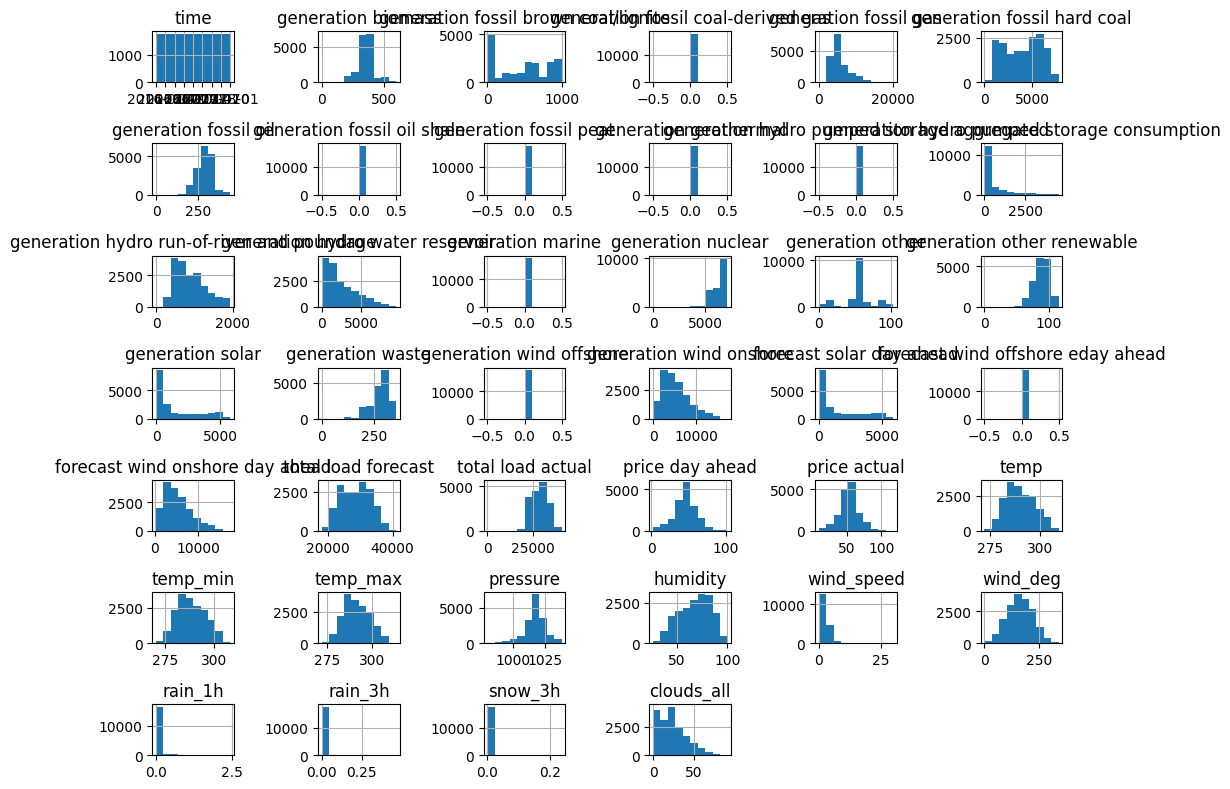

In [592]:
import pandas as pd
import matplotlib.pyplot as plt

# Display histogram for each column
merged_df_2015_to_2017.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

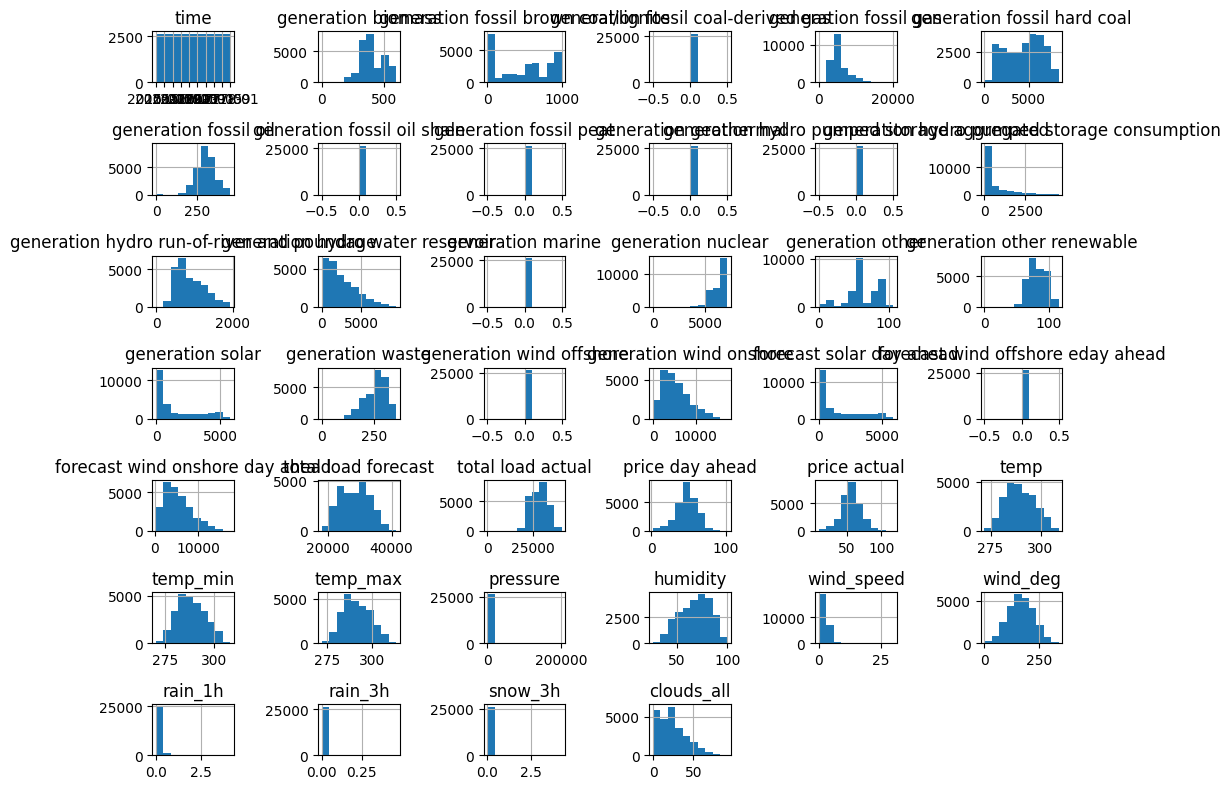

In [593]:
# Display histogram for each column
merged_df_2015_to_2017.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()